In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Load an existing dataset(Breast Cancer Dataset from sklearn)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['malignant'] =data.target

In [6]:
#Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

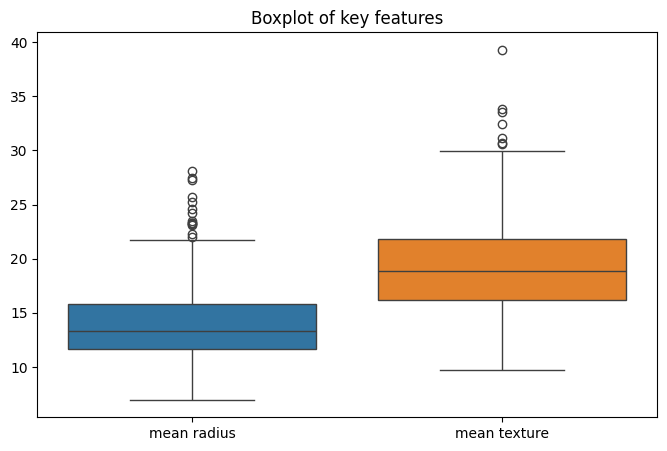

In [7]:
# Box plot (using only two key features)
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['mean radius','mean texture']])
plt.title("Boxplot of key features")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

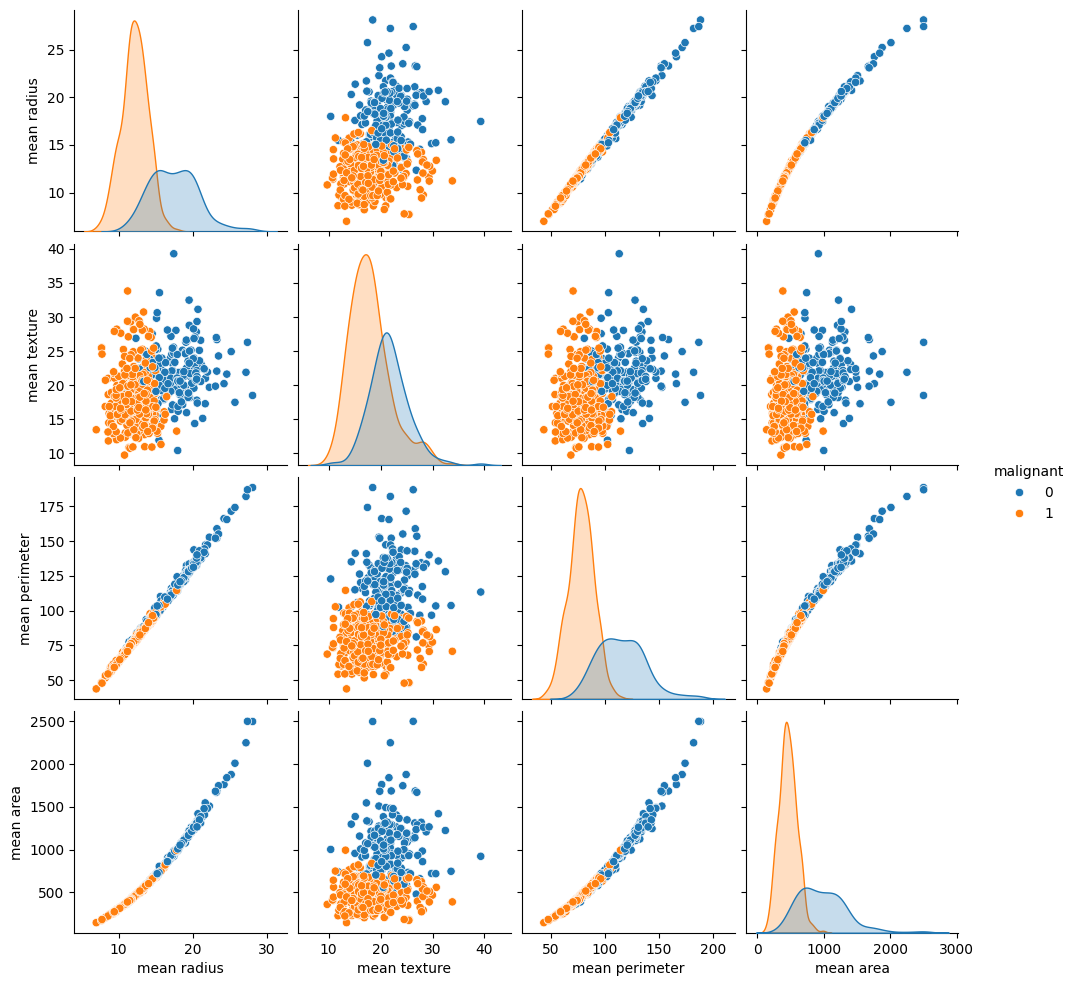

In [8]:
#pair plot
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','malignant']],hue='malignant')
plt.show

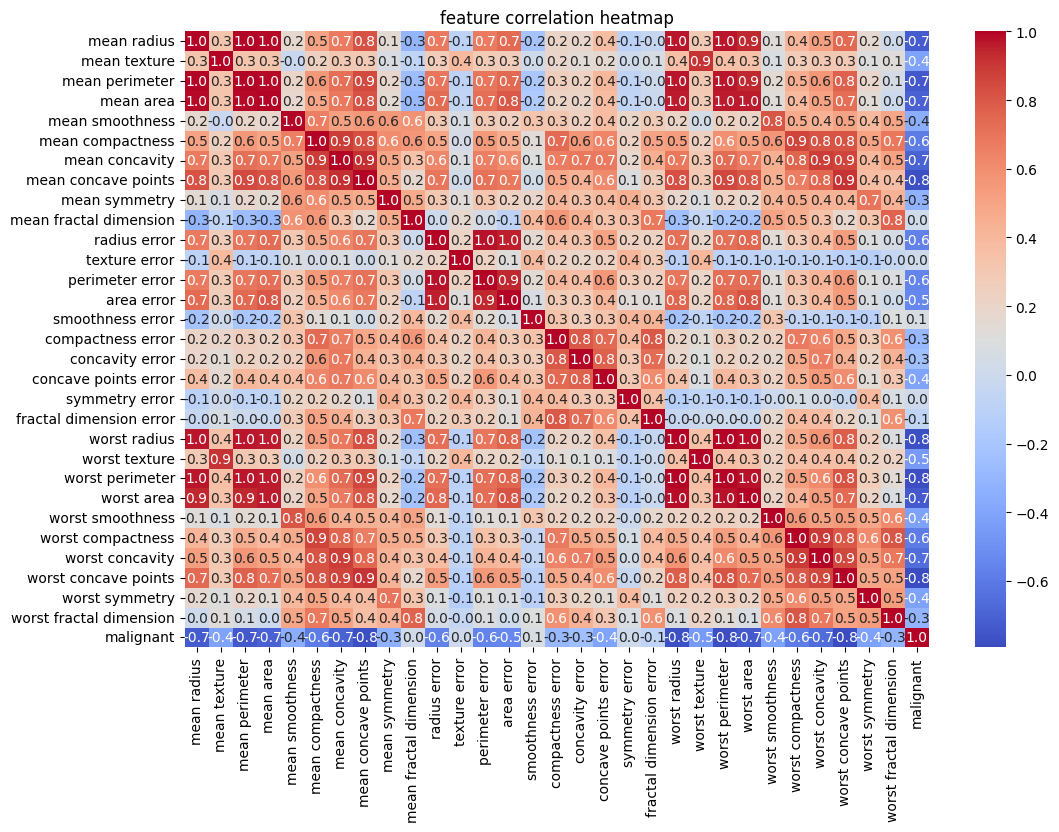

In [9]:
#Heatmap of feature correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("feature correlation heatmap")
plt.show()

In [10]:
#Data Scaling and Normalization
scaler = StandardScaler()
df[data.feature_names] - scaler.fit_transform(df[data.feature_names])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,16.892936,12.453335,121.530066,1000.015625,-1.450066,-3.005915,-2.352774,-2.385375,-1.975615,-2.177037,...,23.493310,18.689293,182.296399,2016.998763,-1.145486,-1.951065,-1.397626,-2.030676,-2.290522,-1.818115
1,18.740179,18.123632,131.214045,1324.091292,0.911702,0.565712,0.110746,-0.477974,0.179808,0.925322,...,23.184073,23.779203,157.264874,1954.109511,0.499412,0.617044,0.388349,-0.901084,0.518890,-0.192170
2,18.110112,20.793813,128.433497,1201.441116,-0.832610,-0.893026,-1.166078,-1.909331,-0.732785,0.457998,...,22.058130,25.553974,151.152525,1707.543715,-0.383007,-0.658432,-0.404574,-1.712000,-0.790955,-0.113811
3,12.188909,20.126268,78.172687,386.864464,-3.141053,-3.119009,-1.674497,-1.346507,-2.607683,-4.813479,...,15.191464,26.366016,99.119939,568.250021,-3.184475,-3.027097,-1.302688,-1.918286,-5.382241,-4.762010
4,18.539703,15.491816,133.323427,1295.173771,-0.180072,-0.406540,-1.173011,-1.324193,0.190460,0.621280,...,21.241425,18.136770,150.861461,1573.779276,-0.083156,0.518395,-0.213179,-0.566759,1.104753,0.473880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,19.449005,21.668527,139.939214,1476.656144,-0.930842,-0.103160,-1.703385,-2.182065,0.485189,0.987257,...,23.548815,26.282300,164.347437,2024.984699,-0.237365,0.484618,-0.253812,-1.407551,1.566158,0.780241
565,18.425146,26.164866,129.584069,1259.276158,-0.004658,0.121233,-0.549043,-1.165759,0.392864,1.113941,...,22.153280,36.202601,153.578060,1729.505041,0.807830,0.587020,0.084927,-0.571027,0.789055,1.040348
566,15.897716,26.034426,107.627324,857.522047,0.925034,0.140980,0.045922,-0.052757,0.968117,0.952067,...,18.418639,32.745146,126.120999,1123.572094,0.923487,-0.041335,0.013533,-0.272269,1.326349,0.396609
567,18.761659,26.993543,138.117476,1263.264782,-1.407967,-2.995144,-2.945544,-2.506866,-1.897494,-0.973535,...,23.778761,37.182074,182.296399,1819.346829,-1.265427,-3.036748,-2.258905,-2.024985,-1.510383,-2.095635


In [ ]:
# split dataset
x = df[data.feature_names]
y = df['malignant']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Model Training
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
#Model Evaluation
predictions = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n",classification_report(y_test, predictions))

In [ ]:
#visualization using Matplotlib Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['mean radius'], df['mean texture'], c=df['malignant'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Mean Radius vs Mean Texture')
plt.colorbar(label='Malignant (1) or Benign (0)')
plt.show()

In [37]:
# User Input for prediction
print("Enter feature values for prediction:")
user_input= []
for feature in data.feature_names:
    value= float(input (f"{feature}:"))
    user_input.append(value)

scaled_input= scaler.transform([user_input])
result = model.predict(scaled_input)[0]
print(f'predicted:{"Malignant"if result ==1 else "Benign"}')


Enter feature values for prediction:
mean radius:12


KeyboardInterrupt: Interrupted by user

In [38]:
!ls

sample_data
